In [1]:
#Required libraries
import math
import numpy as np
!pip3 install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 -4*x + 5


In [3]:
f(3.0)

20.0

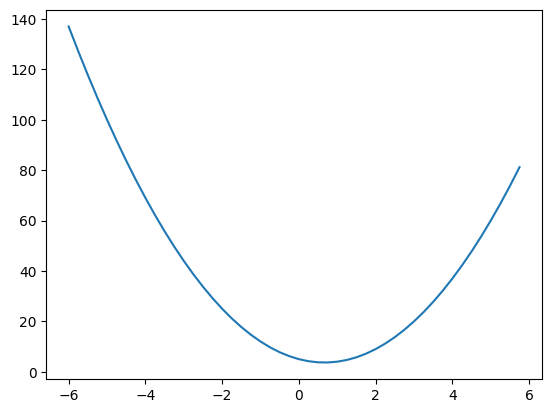

In [4]:
xs = np.arange(-6,6,0.25)
plt.plot(xs,f(xs))

In [5]:
# Dreivative of f(x)

h = 0.00000001
x = 3.0
y = -3.0
z = 2/3
print((f(x+h) - f(x))/h)   # slope formula
print((f(y+h) - f(y))/h)
print((f(z+h) - f(z))/h)


14.00000009255109
-22.00000039920269
0.0


In [6]:
h = 0.00000001

a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
c += h  # keep changing the var to a,b,c then see the changes to the function
d2 = a * b + c

print(d1)
print(d2)
print("slope : ", (d2 - d1)/h)

4.0
4.000000010000001
slope :  1.000000082740371


In [7]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self  check wheather the opssite multiplication is possible
    return self * other  #a * 2 is possible but 2 * a is not possible without this __rrmul__!

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()
        

In [8]:
a = Value(2, label = 'a')
b = Value(-5,label = "b")
c = Value(23, label = "c")
e = a * b; e.label= 'e'
d = e + c; d.label ='d'
f = Value(13, label="f")
L = f * d; L.label='L'


In [9]:
L

Value(data=169)

In [10]:
d._prev

{Value(data=-10), Value(data=23)}

In [11]:
d._op

'+'

In [12]:
 from graphviz import Digraph  #Dont use pip install for this library use conda insted


def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

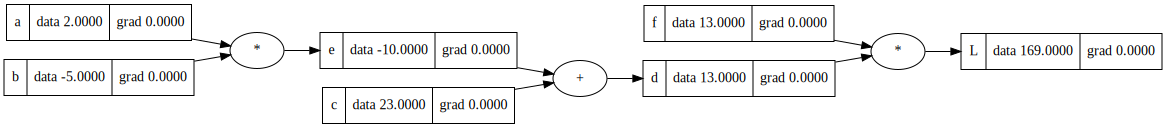

In [13]:
draw_dot(L) #Here the only vale objects are data not the operators

In [14]:
def deriv():
    h = 0.001
    a = Value(2, label = 'a')
    b = Value(-5,label = "b")
    c = Value(23, label = "c")
    e = a * b; e.label= 'e'
    d = e + c; d.label ='d'
    f = Value(13, label="f")
    L = f * d; L.label='L'
    l1 = L.data
    
    a = Value(2  , label = 'a')
    b = Value(-5,label = "b")
    c = Value(23 , label = "c")
    e = a * b; e.label= 'e'
    d = e + c; d.label ='d'
    f = Value(13, label="f")
    L = f * d; L.label='L'
    l2 = L.data + h
    
    print((l2-l1)/h)
    
deriv()



1.0000000000047748


In [15]:
d.grad = 13.00000000000523
f.grad = 13.00000000000523
a.grad = -64.99999999999773
b.grad = 26.00000000001046
e.grad = 13.00000000000523
c.grad = 13.00000000000523
L.grad = 1.0000000000047748


In [16]:
# Changing small value of variables to move towards the gradient

a.data += 0.00000001 * a.grad   # Apply only for leaf nodes
b.data += 0.00000001 * b.grad
c.data += 0.00000001 * c.grad
f.data += 0.00000001 * f.grad

# Running the forward pass

e = a * b
d = e + c
L = f * d
L



Value(data=169.00005238999833)

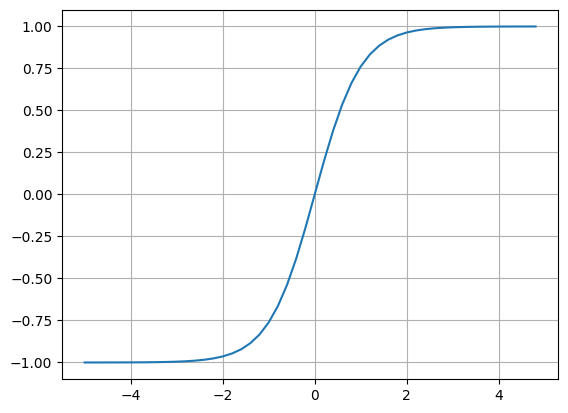

In [17]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [18]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

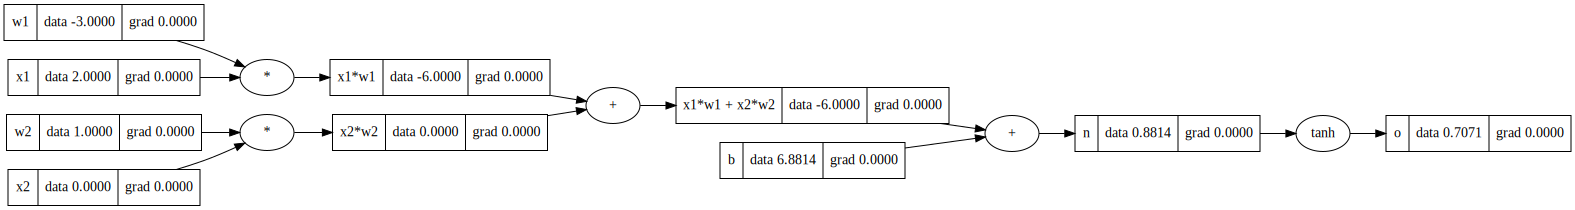

In [19]:
draw_dot(o)

## using _backward function in class to find geadientin reverse  topological order manually

In [20]:
o.grad = 1

In [21]:
o._backward()

In [22]:
n._backward()

In [23]:
x1w1x2w2._backward()

In [24]:
x1w1._backward()
x2w2._backward()

## Using backward function in class to find gradient in reverse topological order Automatically

In [25]:
o.backward()

## Exceptions

In [26]:


a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

'''
        def _backward():
          self.grad = 1.0 * out.grad
          other.grad = 1.0 * out.grad
          
          By using the above step earlier we would just be rewriting the gradient. This is only happens when children nodes are same
          Instead we should add
          
        
        def _backward():
          self.grad += 1.0 * out.grad
          other.grad += 1.0 * out.grad
          
          

'''

'\n        def _backward():\n          self.grad = 1.0 * out.grad\n          other.grad = 1.0 * out.grad\n          \n          By using the above step earlier we would just be rewriting the gradient. This is only happens when children nodes are same\n          Instead we should add\n          \n        \n        def _backward():\n          self.grad += 1.0 * out.grad\n          other.grad += 1.0 * out.grad\n          \n          \n\n'

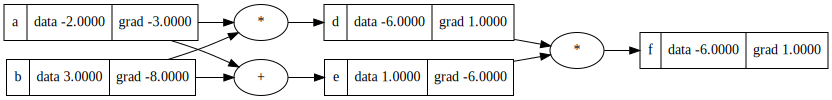

In [27]:


a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)



In [28]:
!which python
!conda list

/Users/jeethu_srini/anaconda3/envs/micrograd/bin/python
# packages in environment at /Users/jeethu_srini/anaconda3/envs/micrograd:
#
# Name                    Version                   Build  Channel
anyio                     3.5.0           py310hca03da5_0  
appnope                   0.1.2           py310hca03da5_1001  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0          py310h1a28f6b_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
attrs                     22.1.0          py310hca03da5_0  
babel                     2.11.0          py310hca03da5_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.11.1          py310hca03da5_0  
blas                      1.0                    openblas  
bleach                    4.1.0              pyhd3eb1b0_0  
boost-cpp                 1.73.0              h1a28f6b_12  
brotlipy                  0.7.0           py310h1a28f6b_1002  
bzip2         

In [29]:
# -*- coding: utf-8 -*-
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined 
# with torch.nn.Parameter) which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')



99 3056.879150390625
199 2043.0361328125
299 1367.17236328125
399 916.3901977539062
499 615.5740356445312
599 414.72265625
699 280.53924560546875
799 190.8408203125
899 130.8415069580078
999 90.68128204345703
1099 63.78147506713867
1199 45.75105285644531
1299 33.65629577636719
1399 25.53681182861328
1499 20.08165168762207
1599 16.41341781616211
1699 13.944681167602539
1799 12.281673431396484
1899 11.160385131835938
1999 10.403646469116211
Result: y = 0.025149229913949966 + 0.8256649971008301 x + -0.00433866074308753 x^2 + -0.08891011774539948 x^3


In [30]:
!python3 --version

Python 3.10.9


In [31]:
!conda list


# packages in environment at /Users/jeethu_srini/anaconda3/envs/micrograd:
#
# Name                    Version                   Build  Channel
anyio                     3.5.0           py310hca03da5_0  
appnope                   0.1.2           py310hca03da5_1001  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0          py310h1a28f6b_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
attrs                     22.1.0          py310hca03da5_0  
babel                     2.11.0          py310hca03da5_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.11.1          py310hca03da5_0  
blas                      1.0                    openblas  
bleach                    4.1.0              pyhd3eb1b0_0  
boost-cpp                 1.73.0              h1a28f6b_12  
brotlipy                  0.7.0           py310h1a28f6b_1002  
bzip2                     1.0.8                h620ffc9_4  
c-ares    

In [32]:
import torch 

In [33]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True   #Double for float64 precision
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())


0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [34]:
x1.shape

torch.Size([1])

In [35]:
x1.item()

2.0

In [36]:
x1.grad.item()

-1.5000003851533106

In [37]:
# Creating a MLP layer by layer
import random
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
    
    def __call__(self, x):  # Use this function to feed the neuron with inputs
        activation = sum((wi*xi for wi,xi in zip(self.w,x)), self.b)
        out = activation.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b] #To fetch parameeters in a single neuron
      

class Layer:
  
      def __init__(self, nin, nout): 
        self.neurons = [Neuron(nin) for _ in range(nout)]  # For each layer initializing two neurons (for eample 2 may be more)

      def __call__(self, x):
        outs = [n(x) for n in self.neurons] 
        return outs[0] if len(outs) == 1 else outs

      def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]   # To fetch parameters form neurons in a layer

class MLP:
  
      def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

      def __call__(self, x):
        for layer in self.layers:
          x = layer(x)
        return x

      def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]   # To fetch parameters in all the layers

    
                

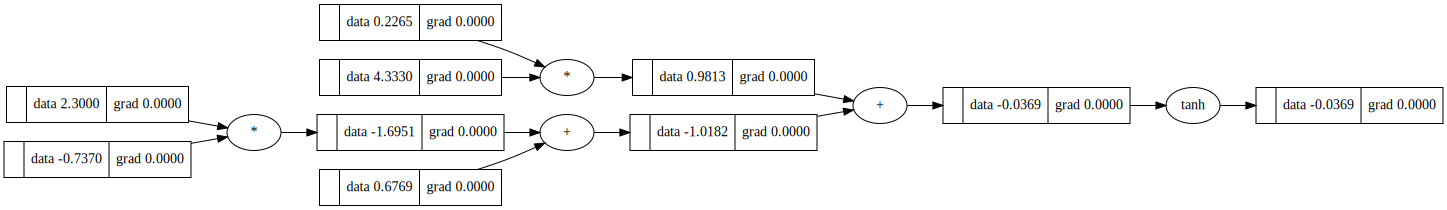

In [38]:
x = [2.3,4.333]
n = Neuron(2)
n(x)
draw_dot(n(x))

In [39]:
x = [2.3,4.333]
n = Layer(2,3)
n(x)
#draw_dot(i for i in n(x)) not working


[Value(data=0.3829414203320206),
 Value(data=-0.9996426918994785),
 Value(data=-0.9161030948844701)]

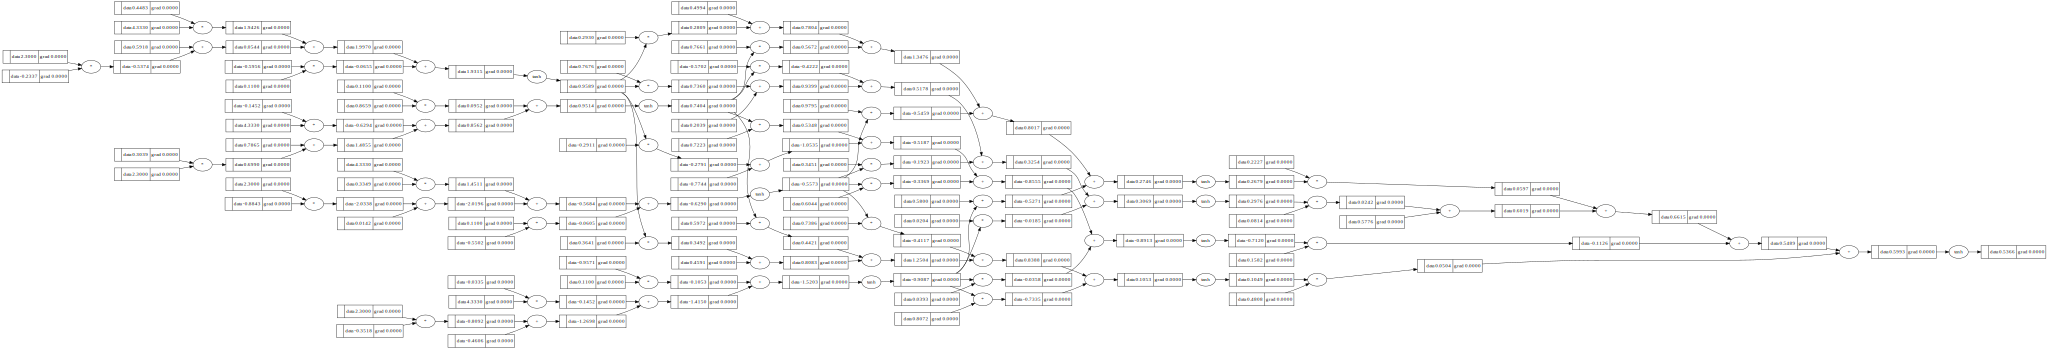

In [40]:
x = [2.3,4.333,0.11]
n = MLP(3, [4,4,1])
draw_dot(n(x))


In [41]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets


In [42]:
for k in range(20):
    
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred)) # A Normal loss functions
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.05 * p.grad    # Indicating the step size
  
  print(k, loss.data)
  
  

0 3.3736723670163915
1 1.3838017100595639
2 0.5436812214225999
3 0.30208214751190415
4 0.20420639236687219
5 0.15270893928438017
6 0.12127192423612453
7 0.10020420682460321
8 0.08515627710970551
9 0.07389915835957495
10 0.06517709270607461
11 0.058230538317466454
12 0.052573986952601306
13 0.04788305764927908
14 0.04393302594164501
15 0.040563429243619005
16 0.03765671852052513
17 0.03512486823336846
18 0.03290069224013142
19 0.030932046456577385


In [43]:
n.parameters()  #List of all weights...

[Value(data=-0.3256158762277975),
 Value(data=0.3383282363268691),
 Value(data=-0.7462853242640799),
 Value(data=0.4512378925165658),
 Value(data=0.35006680343157653),
 Value(data=-0.0723200258568651),
 Value(data=0.8038884505854391),
 Value(data=0.8002142441172533),
 Value(data=-0.8113327419910952),
 Value(data=0.38473915738370856),
 Value(data=-0.8335760601323772),
 Value(data=-0.07020302306854893),
 Value(data=-0.27032899779890834),
 Value(data=0.09641730386474348),
 Value(data=-1.0637440283252666),
 Value(data=-0.4352664501155092),
 Value(data=0.7993131244941608),
 Value(data=-0.6343199301181103),
 Value(data=0.40449197186137975),
 Value(data=0.10101859809586292),
 Value(data=0.1604949696543852),
 Value(data=0.3272739344612627),
 Value(data=0.6352461995401618),
 Value(data=1.0860627226434338),
 Value(data=0.7157418881781275),
 Value(data=0.3795945389968945),
 Value(data=-0.25164502665633615),
 Value(data=0.6432989661821198),
 Value(data=0.6778542727310802),
 Value(data=0.1309125832

In [44]:
print(f"{ys} \n{ypred}") # Final results!!!

[1.0, -1.0, -1.0, 1.0] 
[Value(data=0.9211375219131737), Value(data=-0.9429962775292318), Value(data=-0.8762119952895788), Value(data=0.921642731537715)]
